# Final Project Planner

Every time we conduct an analysis, we need to formulate several hypotheses and test them further. Sometimes, the tests we do lead us to accept the hypothesis, other times we also need to reject it. To make the right decisions in business, we must understand whether the assumptions we make are correct or not.

In this project, as an analyst, we analyze the customer behavior from the retail store.

## Purpose:
The main objective of this project is to find out the behavior of customers, both members and non-members (#SUSU: what kind of membership is this?), and whether this affects buying and selling at retail stores and which one is more profitable for retail. As for this goal, the steps that need to be taken include:
1. Collecting data
2. Explorative Data Analysis (EDA)
3. Analyzing data (customer behavior)
4. Reporting the result to the retailer's operations


## Steps:
There are several steps of the `project 1` analysis this time, namely:
1. Data Overview and Explorative Data Analysis (EDA)including cleaning and repairing data
2. Analyze the loyalty program (member/non)
3. Formulate statical hypotheses  
4. Data visualization
(#SUSU: these 4 points here are a bit redundant with the 4 points you listed above under "Purpose". can you consolidate this?)

- Data Overview (Step 1. Downloading and Preparing the Data for Analysis)
  At this stage,  we will retrieve and analyze stored in files:
  1. **`'/datasets/retail_dataset_us.csv'`** as a main dataset, consist:
  
      - `purchaseid` - purchased id (strings)
      - `item_ID` - items id (strings)
      - `Quantity` - number of items purchased (integer)
      - `purchasedate` - purchase date (datetime)
      - `CustomerID` - customer id	(strings)
      - `loyalty_program` - members/non-members (boolean) 
      - `ShopID` - shop id (strings)  
      
  2. **`'/datasets/product_codes_us.csv'`** as support for the selling price per unit, consists of:
  
      - `price_per_one`- price per unit
      
  Then, we examine the Data. Next, we will ensure Data Type, Array Form, Missing Values, Duplicate Data, and Correcting Data. In addition, we do Explorative Data Analysis.
  
  
- Step 2. Data Analysis
  In this stage, we have several mission tasks to be processed and analyzed, they are:
  1. Is the average spending the same between members and non-members?
  2. Are expenses higher for members or non-members?
  3. Distribution of the loyalty program
  4. On which day do more customers come?
  5. Are the customers who have stayed from the initial data to the last reduced/not?


- Step 3. Formulate statical hypotheses
  The hypothesis test consists of:
  1. Is the average purchase between members and non-members the same
  2. Whether total purchases between members and non-members are the same
  
  
- Step 4. Data visualization
  Here we are going to plot:
  1. Count Plot:- to see if the dataset is balanced or not
  2. Histograms:- to see if data is normally distributed or skewed
  3. Box Plot:- to analyze the distribution and see the outliers
  4. Scatter plots:- to understand the relationship between any two variables
  5. Pair plot:- to create a scatter plot between all the variables
  

- Step. 5. Conclusion and Business Recommendation
  1. Who needs the data results and from whom is the data obtained?
  2. What benefits can be given to marketing programs?

This last stage is to conclude the results of customer analysis in retail stores to the retailer's operations and provide recommendations to the marketing department on what needs to be improved and done to maintain or increase the level of customer loyalty in buying and selling transactions at retail stores.

# Step 1. Download data and prepare it for analysis

## Create library

In [1]:
#load library
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import math as mth
import seaborn as sns
from scipy import stats as st
import plotly
import scipy.stats as stats
import plotly.express as px
from plotly import graph_objs as go
from __future__ import division
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
%matplotlib inline

from scipy.stats import spearmanr

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import accuracy_score, precision_score, recall_score

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.precision', 15)
pd.set_option('display.max_columns', 300)

## Load the data

In the following Data Overview, we'll open up the data using `head()`, `info()`, `describe()`, and `isnull().sum()` functions to further explore the dataset.

- **Retail**
    
    This `Retail` table contains the following columns:
    - purchaseid - purchased id
    - item_ID - items id
    - Quantity - number of items purchased
    - purchasedate - purchase date
    - CustomerID - customers id
    - loyalty_program - members / non-members
    - ShopID - shop id

In [2]:
# reading dataset
retail = pd.read_csv('/datasets/retail_dataset_us.csv')
retail.head()

,purchaseid,item_ID,Quantity,purchasedate,CustomerID,loyalty_program,ShopID
0,538280,21873,11,2016-12-10 12:50:00,18427.0,0,Shop 3
1,538862,22195,0,2016-12-14 14:11:00,22389.0,1,Shop 2
2,538855,21239,7,2016-12-14 13:50:00,22182.0,1,Shop 3
3,543543,22271,0,2017-02-09 15:33:00,23522.0,1,Shop 28
4,543812,79321,0,2017-02-13 14:40:00,23151.0,1,Shop 28


In [3]:
# getting dataset infromation
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105335 entries, 0 to 105334
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   purchaseid       105335 non-null  object 
 1   item_ID          105335 non-null  object 
 2   Quantity         105335 non-null  int64  
 3   purchasedate     105335 non-null  object 
 4   CustomerID       69125 non-null   float64
 5   loyalty_program  105335 non-null  int64  
 6   ShopID           105335 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 5.6+ MB


In [4]:
# getting statical information about our dataset
retail.describe()

,Quantity,CustomerID,loyalty_program
count,105335.000000000000000,69125.000000000000000,105335.000000000000000
mean,7.821218018702235,21019.302047016273718,0.226344519865192
std,327.946694907624874,1765.444679266724734,0.418466654159923
min,-74216.000000000000000,18025.000000000000000,0.000000000000000
25%,0.000000000000000,19544.000000000000000,0.000000000000000
50%,2.000000000000000,20990.000000000000000,0.000000000000000
75%,7.000000000000000,22659.000000000000000,0.000000000000000
max,74214.000000000000000,23962.000000000000000,1.000000000000000


In [5]:
# checking for missing value
retail.isnull().sum()

purchaseid             0
item_ID                0
Quantity               0
purchasedate           0
CustomerID         36210
loyalty_program        0
ShopID                 0
dtype: int64

In [6]:
# checking dublicate rows in dataset
retail.duplicated().sum()

1033

As can be seen, this retail dataset requires several improvements, such as:
- Column name fixes
- Fixed the data type in the `purchasedate` and `CustomerID` columns
- Found a missing value of 36210 in `CustomerID`
- Found duplicate rows of 1033

- **Product**
    
    This `product` table contains the following columns:
    - price_per_one- price per unit

In [7]:
# reading dataset
product = pd.read_csv('/datasets/product_codes_us.csv', sep=';')
product.head()

,productID,price_per_one
0,10002,0.85
1,10080,0.85
2,10120,0.21
3,10123C,0.65
4,10124A,0.42


In [8]:
# getting dataset infromation
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3159 entries, 0 to 3158
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   productID      3159 non-null   object 
 1   price_per_one  3159 non-null   float64
dtypes: float64(1), object(1)
memory usage: 49.5+ KB


In [9]:
# getting statical information about our dataset
product.describe()

,price_per_one
count,3159.000000000000000
mean,2.954495093383982
std,7.213807949543177
min,0.000000000000000
25%,0.650000000000000
50%,1.450000000000000
75%,3.290000000000000
max,175.000000000000000


In [10]:
# checking for missing value
product.isnull().sum()

productID        0
price_per_one    0
dtype: int64

In [11]:
# checking dublicate rows in dataset
product.duplicated().sum()

0

The product dataset shows that there are no missing values found, however, there are 1033 duplicate rows found in the `retail` df and we need to fix the column name as well.

# Step 2. Data Exploratory

## Fixing The Column Names

Here we will change or improve the writing of several column names in both datasets (retail and product) by lowercase using .rename().

### Retail dataset

In [12]:
retail.columns

Index(['purchaseid', 'item_ID', 'Quantity', 'purchasedate', 'CustomerID',
       'loyalty_program', 'ShopID'],
      dtype='object')

In [13]:
# Replace a new column name
retail.rename(columns={
    'purchaseid': 'purchase_id',
    'item_ID': 'item_id',
    'Quantity': 'quantity',
    'purchasedate': 'purchase_date',
    'CustomerID': 'customer_id',
    'ShopID': 'shop_id',
}, inplace=True)

retail.columns

Index(['purchase_id', 'item_id', 'quantity', 'purchase_date', 'customer_id',
       'loyalty_program', 'shop_id'],
      dtype='object')

In [14]:
retail.head(3)

,purchase_id,item_id,quantity,purchase_date,customer_id,loyalty_program,shop_id
0,538280,21873,11,2016-12-10 12:50:00,18427.0,0,Shop 3
1,538862,22195,0,2016-12-14 14:11:00,22389.0,1,Shop 2
2,538855,21239,7,2016-12-14 13:50:00,22182.0,1,Shop 3


### Product dataset

In [15]:
product.columns

Index(['productID', 'price_per_one'], dtype='object')

In [16]:
# Replace a new column name
product.rename(columns={'productID': 'product_id'}, inplace=True)
product.columns

Index(['product_id', 'price_per_one'], dtype='object')

In [17]:
product.head(3)

,product_id,price_per_one
0,10002,0.85
1,10080,0.85
2,10120,0.21


All clear! Column names in both datasets have been fixed. Let's move to the next step.

## Handling Missing Values

- **Missing value in column `customer_id`**

At this stage, before we decide to deal with missing values, we will first find out the cause of the missing values. Let's look at the stages as follows:


In [18]:
#checking for missing value
retail.customer_id.isnull().sum()

36210

In [19]:
retail[retail['customer_id'].isna()]

,purchase_id,item_id,quantity,purchase_date,customer_id,loyalty_program,shop_id
6,540468,22189,0,2017-01-07 13:55:00,NaN,0,Shop 0
7,541424,79321,1,2017-01-17 17:57:00,NaN,0,Shop 0
8,538883,22891,0,2016-12-14 15:56:00,NaN,0,Shop 0
11,541696,22197,4,2017-01-20 18:08:00,NaN,0,Shop 0
16,539744,22300,5,2016-12-21 15:21:00,NaN,0,Shop 0
...,...,...,...,...,...,...,...
105325,536982,20719,69,2016-12-03 14:27:00,NaN,0,Shop 0
105326,540681,22227,1,2017-01-10 16:25:00,NaN,0,Shop 0
105327,538349,22625,0,2016-12-10 14:59:00,NaN,0,Shop 0
105329,540154,22134,3,2017-01-05 11:30:00,NaN,0,Shop 0


In [20]:
# Fill missing values in column 'customer_id' with a specific value
retail['customer_id'] = retail['customer_id'].fillna(0)
retail.tail(10)

,purchase_id,item_id,quantity,purchase_date,customer_id,loyalty_program,shop_id
105325,536982,20719,69,2016-12-03 14:27:00,0.0,0,Shop 0
105326,540681,22227,1,2017-01-10 16:25:00,0.0,0,Shop 0
105327,538349,22625,0,2016-12-10 14:59:00,0.0,0,Shop 0
105328,537886,22158,7,2016-12-09 09:49:00,21339.0,0,Shop 13
105329,540154,22134,3,2017-01-05 11:30:00,0.0,0,Shop 0
105330,538566,21826,1,2016-12-13 11:21:00,0.0,0,Shop 0
105331,540247,21742,0,2017-01-05 15:56:00,21143.0,0,Shop 24
105332,538068,85048,1,2016-12-09 14:05:00,23657.0,1,Shop 16
105333,538207,22818,11,2016-12-10 11:33:00,18427.0,0,Shop 29
105334,543977,22384,9,2017-02-14 15:35:00,21294.0,0,Shop 19


## Handling Duplicate Data


In [21]:
# checking dublicate rows in dataset
retail.duplicated().sum()

1033

In [22]:
retail = retail.drop_duplicates()
retail.duplicated().sum()

0

## Converting Data Dypes

The process of changing this data type is carried out, if there is a data type that does not match as it should, for example a column with a date should have a datetime data type.

In [23]:
retail.dtypes

purchase_id         object
item_id             object
quantity             int64
purchase_date       object
customer_id        float64
loyalty_program      int64
shop_id             object
dtype: object

In [24]:
# convert data type to datetime
retail['purchase_date'] = pd.to_datetime(retail['purchase_date'])
retail.dtypes

purchase_id                object
item_id                    object
quantity                    int64
purchase_date      datetime64[ns]
customer_id               float64
loyalty_program             int64
shop_id                    object
dtype: object

In [25]:
# Convert data type to integer
retail['customer_id'] = retail['customer_id'].astype(int)
retail.dtypes

purchase_id                object
item_id                    object
quantity                    int64
purchase_date      datetime64[ns]
customer_id                 int64
loyalty_program             int64
shop_id                    object
dtype: object

# Step 3. Explorative Data Analysis

## The average purchases by loyalty program (membership / non membership)

Here we will see the average purchases from the loyalty program (members and non-members), from there we can see where retail stores get more income. Let's follow the steps below.

In [26]:
retail.head()

,purchase_id,item_id,quantity,purchase_date,customer_id,loyalty_program,shop_id
0,538280,21873,11,2016-12-10 12:50:00,18427,0,Shop 3
1,538862,22195,0,2016-12-14 14:11:00,22389,1,Shop 2
2,538855,21239,7,2016-12-14 13:50:00,22182,1,Shop 3
3,543543,22271,0,2017-02-09 15:33:00,23522,1,Shop 28
4,543812,79321,0,2017-02-13 14:40:00,23151,1,Shop 28


In [27]:
product.head()

,product_id,price_per_one
0,10002,0.85
1,10080,0.85
2,10120,0.21
3,10123C,0.65
4,10124A,0.42


In [28]:
retails = retail.merge(product, left_on=['item_id'], right_on=['product_id'])
retails.head(10)

,purchase_id,item_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,product_id,price_per_one
0,538280,21873,11,2016-12-10 12:50:00,18427,0,Shop 3,21873,0.42
1,541104,21873,0,2017-01-13 14:29:00,0,0,Shop 0,21873,0.42
2,540418,21873,1,2017-01-07 11:04:00,0,0,Shop 0,21873,0.42
3,541516,21873,2,2017-01-18 17:34:00,0,0,Shop 0,21873,0.42
4,541566,21873,35,2017-01-19 11:50:00,23401,1,Shop 22,21873,0.42
5,538843,21873,1,2016-12-14 13:18:00,21712,0,Shop 9,21873,0.42
6,540838,21873,11,2017-01-11 15:13:00,19541,0,Shop 4,21873,0.42
7,543592,21873,5,2017-02-10 11:57:00,22922,1,Shop 15,21873,0.42
8,544651,21873,71,2017-02-22 12:51:00,19373,0,Shop 17,21873,0.42
9,545062,21873,0,2017-02-27 14:07:00,18427,0,Shop 18,21873,0.42


In [29]:
retails['total_price'] = retails['quantity'] * retails['price_per_one']
retails.head()

,purchase_id,item_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,product_id,price_per_one,total_price
0,538280,21873,11,2016-12-10 12:50:00,18427,0,Shop 3,21873,0.42,4.620000000000000
1,541104,21873,0,2017-01-13 14:29:00,0,0,Shop 0,21873,0.42,0.000000000000000
2,540418,21873,1,2017-01-07 11:04:00,0,0,Shop 0,21873,0.42,0.420000000000000
3,541516,21873,2,2017-01-18 17:34:00,0,0,Shop 0,21873,0.42,0.840000000000000
4,541566,21873,35,2017-01-19 11:50:00,23401,1,Shop 22,21873,0.42,14.699999999999999


In [30]:
average_purchase_members = retails[retails['loyalty_program'] == 1]['total_price'].mean()
average_purchase_non_members = retails[retails['loyalty_program'] == 0]['total_price'].mean()

In [31]:
# Remove trailing zeros using string formatting
average_purchase_members_formatted = '{:.3f}'.format(average_purchase_members).rstrip('0').rstrip('.')
average_purchase_non_members_formatted = '{:.3f}'.format(average_purchase_non_members).rstrip('0').rstrip('.')

print("Average purchase for members:", average_purchase_members_formatted)
print("Average purchase for non-members:", average_purchase_non_members_formatted)

Average purchase for members: 11.171
Average purchase for non-members: 8.826


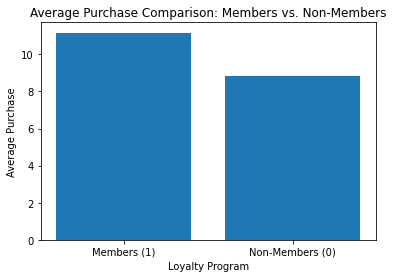

In [32]:
# Create a bar plot
labels = ['Members (1)', 'Non-Members (0)']
average_purchase = [average_purchase_members, average_purchase_non_members]

plt.bar(labels, average_purchase)
plt.xlabel('Loyalty Program')
plt.ylabel('Average Purchase')
plt.title('Average Purchase Comparison: Members vs. Non-Members')
plt.show()

It can be seen from the results that the average purchase between members and non-members of the loyalty_program is almost 27% higher than the non-members, maybe that's already a bit number in retail. With an average purchase for members of 11.171 and an average purchase for non-members of 8.826.

## Are expenses higher for members or non-members?

In [33]:
# Calculate total purchases for members and non-members
purchases_members = retails[retails['loyalty_program'] == 1]['total_price'].sum()
purchases_non_members = retails[retails['loyalty_program'] == 0]['total_price'].sum()

In [34]:
# Compare the purchase counts
if purchases_members > purchases_non_members:
    higher_purchases_group = 'members'
elif purchases_members < purchases_non_members:
    higher_purchases_group = 'non-members'
else:
    higher_purchases_group = 'equal'

print("Purchase count for members:", purchases_members)
print("Purchase count for non-members:", purchases_non_members)
print("The group with higher purchases:", higher_purchases_group)

Purchase count for members: 261525.61
Purchase count for non-members: 713920.4500000001
The group with higher purchases: non-members


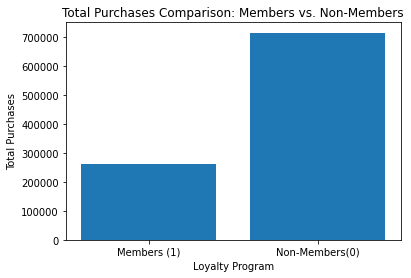

In [35]:
# Create a bar plot
labels = ['Members (1)', 'Non-Members(0)']
purchases = [purchases_members, purchases_non_members]

plt.bar(labels, purchases)
plt.xlabel('Loyalty Program')
plt.ylabel('Total Purchases')
plt.title('Total Purchases Comparison: Members vs. Non-Members')
plt.show()

In [36]:
retails.groupby('loyalty_program')['total_price'].agg(['mean','sum']).sort_values(by='mean',ascending=False)

,mean,sum
loyalty_program,,
1,11.170579617290576,261525.610000006970949
0,8.825818395351499,713920.449999982723966


However, when seen from the results of a comparison between the total expenditure from the loyalty_program, non_members have the largest total purchases of 713920.449 compared to the total purchases of members which are 3 times less, namely 261525.61 which can happen due to the large number of different customers who make purchases for themselves, while for fewer members the biggest possibility is customers who have large projects that will continue to repeat and continue.


## The number of items in the cart is based on the loyalty program

In [37]:
items_in_cart = retails.groupby('loyalty_program')['quantity'].sum()

items_in_cart

loyalty_program
0    593520
1    228693
Name: quantity, dtype: int64

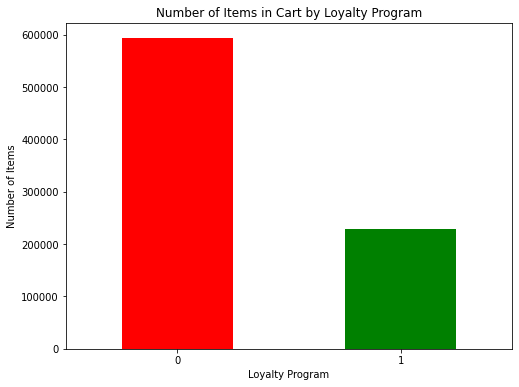

In [38]:
# Create the bar plot
plt.figure(figsize=(8, 6))
items_in_cart.plot(kind='bar', color=['red', 'green'])
plt.title('Number of Items in Cart by Loyalty Program')
plt.xlabel('Loyalty Program')
plt.ylabel('Number of Items')
plt.xticks(rotation=0)
plt.show()

From the results obtained, the number of items in baskets is dominated by customers who do not participate in the loyalty program with a total of 593520 items and for loyalty program members as many as 228693 items (which is less than half of non-member items).

## Distribution of the loyalty program

In [39]:
# Calculate the distribution of members and non-members
member_count = retails[retails['loyalty_program'] == 1].shape[0]
non_member_count = retails[retails['loyalty_program'] == 0].shape[0]
total_count = member_count + non_member_count

member_distribution = member_count / total_count
non_member_distribution = non_member_count / total_count

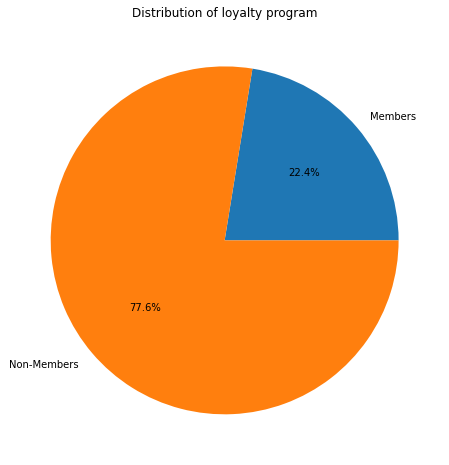

In [40]:
# Create a pie chart
labels = ['Members', 'Non-Members']
distributions = [member_distribution, non_member_distribution]

fig, ax = plt.subplots(figsize=(8, 8))
plt.pie(distributions, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of loyalty program')
plt.show()

In [41]:
# Calculate the count of members and non-members
loyalty_program_counts = retails['loyalty_program'].value_counts()
loyalty_program_counts

0    80890
1    23412
Name: loyalty_program, dtype: int64

As we can see, the distribution of customer distribution from the loyalty program is:
- Members as much as 22.4%
- Non-members as much as 77.6%

## On which day do more customers come?

In [42]:
# Convert 'purchase_date' column to datetime type
retails['purchase_date'] = pd.to_datetime(retails['purchase_date'])

In [43]:
# Group by 'purchase_date' and count the unique 'customer_id' for each day
customer_count_by_day = retails.groupby(retails['purchase_date'].dt.date)['customer_id'].nunique()
customer_count_by_day

purchase_date
2016-12-01     99
2016-12-02    118
2016-12-03     56
2016-12-05     77
2016-12-06     91
             ... 
2017-02-23     54
2017-02-24     58
2017-02-25     45
2017-02-27     31
2017-02-28     50
Name: customer_id, Length: 68, dtype: int64

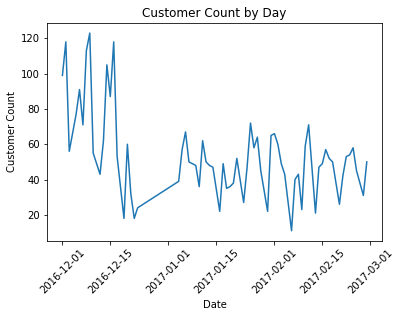

In [44]:
# Create a line plot
plt.plot(customer_count_by_day.index, customer_count_by_day.values)
plt.xlabel('Date')
plt.ylabel('Customer Count')
plt.title('Customer Count by Day')
plt.xticks(rotation=45)
plt.show()

In [45]:
# Find the day with the highest customer count
day_with_most_customers = customer_count_by_day.idxmax()

print("Day with the most customers:", day_with_most_customers)

Day with the most customers: 2016-12-09


As we can see from the line plot above, many visitors tend to come on Friday, more precisely on 2016-12-09.

## Distribution of Purchase Loyalty Program by Shop ID

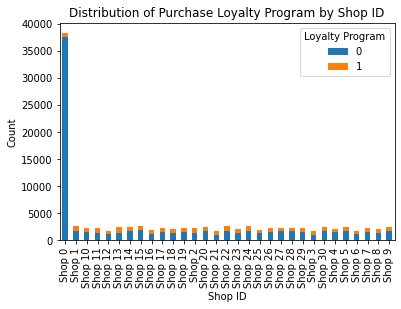

In [46]:
# Group by 'shop_id' and 'loyalty_program' and count the occurrences
loyalty_program_distribution = retails.groupby(['shop_id', 'loyalty_program']).size().unstack()

# Create a stacked bar plot
loyalty_program_distribution.plot(kind='bar', stacked=True)

plt.xlabel('Shop ID')
plt.ylabel('Count')
plt.title('Distribution of Purchase Loyalty Program by Shop ID')
plt.legend(title='Loyalty Program')

plt.show()
# SUSU: if you plot the different shops like this, would be nice if you could sort them, so that the x-axis starts with shop 0 and ends with the highest shop number

In [47]:
retails.pivot_table(index='loyalty_program',columns='shop_id',values='total_price', aggfunc=(['count']))

count                                                         \
shop_id         Shop 0 Shop 1 Shop 10 Shop 11 Shop 12 Shop 13 Shop 14 Shop 15   
loyalty_program                                                                 
0                37466   1737    1521    1354    1178    1384    1638    1854   
1                  837    952     660     920     580    1027     728     825   

                                                                        \
shop_id         Shop 16 Shop 17 Shop 18 Shop 19 Shop 2 Shop 20 Shop 21   
loyalty_program                                                          
0                  1191    1430    1259    1549   1225    1642     981   
1                   729     734     736     660    999     760     670   

                                                                         \
shop_id         Shop 22 Shop 23 Shop 24 Shop 25 Shop 26 Shop 27 Shop 28   
loyalty_program                                                           
0                  1640    1328    1658    1228    1419    1648    1682   
1                   898     713     966     674     880     648     624   

                                                                           \
shop_id         Shop 29 Shop 3 Shop 30 Shop 4 Shop 5 Shop 6 Shop 7 Shop 8   
loyalty_program                                                             
0                  1469   1020    1670   1454   1694   1148   1540   1263   
1                   712    683     689    510    775    525    771    700   

                        
shop_id         Shop 9  
loyalty_program         
0                 1620  
1                  827

Here we can see a comparison between the number or number of members and non-members shopping at several stores. It can be seen, non-members tend to make purchases at store 0 with a total of 37,466 customers. However, customers who are members make more purchases at store 13 with a total of 1027. This can happen with the possibility, that in Store 0 the items offered more complete for non-members.

## Are the customers who have stayed from the initial data to the last reduced/not?

**Make Cohort Analysis**

Cohort analysis is generally used to show behavious of users, or in our case, customers, over time. It is an incredibly useful instrument to find some insights about customer experiences, and to understand how to improve that.
And I will use cohort analysis to investigate retention rate and to understand how many of the all customers are still active.Retention gives you the percentage of active customers compared to the total number of customers.



In [48]:
# Convert 'purchase_date' column to datetime type
retails['purchase_date'] = pd.to_datetime(retails['purchase_date'])

In [49]:
# Calculate the number of months in purchase_date
num_months = (retails['purchase_date'].max().to_period('M') - retails['purchase_date'].min().to_period('M')).n + 1
num_months

3

### Monthly Cohort

In [50]:
#creating purchase month column to see first month when customer purchased 
retails['purchase_month'] = retail['purchase_date'].apply(lambda x: dt.datetime(x.year, x.month, 1))
retails.head()

,purchase_id,item_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,product_id,price_per_one,total_price,purchase_month
0,538280,21873,11,2016-12-10 12:50:00,18427,0,Shop 3,21873,0.42,4.620000000000000,2016-12-01
1,541104,21873,0,2017-01-13 14:29:00,0,0,Shop 0,21873,0.42,0.000000000000000,2016-12-01
2,540418,21873,1,2017-01-07 11:04:00,0,0,Shop 0,21873,0.42,0.420000000000000,2016-12-01
3,541516,21873,2,2017-01-18 17:34:00,0,0,Shop 0,21873,0.42,0.840000000000000,2017-02-01
4,541566,21873,35,2017-01-19 11:50:00,23401,1,Shop 22,21873,0.42,14.699999999999999,2017-02-01


In [51]:
grouping = retails.groupby('customer_id')['purchase_month']
#assign smallest invoice value to each customer
retails['cohort_month'] = grouping.transform('min')
retails.head()

,purchase_id,item_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,product_id,price_per_one,total_price,purchase_month,cohort_month
0,538280,21873,11,2016-12-10 12:50:00,18427,0,Shop 3,21873,0.42,4.620000000000000,2016-12-01,2016-12-01
1,541104,21873,0,2017-01-13 14:29:00,0,0,Shop 0,21873,0.42,0.000000000000000,2016-12-01,2016-12-01
2,540418,21873,1,2017-01-07 11:04:00,0,0,Shop 0,21873,0.42,0.420000000000000,2016-12-01,2016-12-01
3,541516,21873,2,2017-01-18 17:34:00,0,0,Shop 0,21873,0.42,0.840000000000000,2017-02-01,2016-12-01
4,541566,21873,35,2017-01-19 11:50:00,23401,1,Shop 22,21873,0.42,14.699999999999999,2017-02-01,2016-12-01


In [52]:
#function to extract year, month, day as integers
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

In [53]:
#extract month
purcahse_year, purcahse_month, _ = get_date_int(retails, 'purchase_month')
cohort_year, cohort_month, _ = get_date_int(retails, 'cohort_month')

In [54]:
years_diff = purcahse_year - cohort_year
months_diff = purcahse_month - cohort_month

In [55]:
# Extract the difference in days from all previous values
retails['cohort_index'] = years_diff * 12 + months_diff + 1
retails.head()

,purchase_id,item_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,product_id,price_per_one,total_price,purchase_month,cohort_month,cohort_index
0,538280,21873,11,2016-12-10 12:50:00,18427,0,Shop 3,21873,0.42,4.620000000000000,2016-12-01,2016-12-01,1.0
1,541104,21873,0,2017-01-13 14:29:00,0,0,Shop 0,21873,0.42,0.000000000000000,2016-12-01,2016-12-01,1.0
2,540418,21873,1,2017-01-07 11:04:00,0,0,Shop 0,21873,0.42,0.420000000000000,2016-12-01,2016-12-01,1.0
3,541516,21873,2,2017-01-18 17:34:00,0,0,Shop 0,21873,0.42,0.840000000000000,2017-02-01,2016-12-01,3.0
4,541566,21873,35,2017-01-19 11:50:00,23401,1,Shop 22,21873,0.42,14.699999999999999,2017-02-01,2016-12-01,3.0


In [56]:
#count monthly active customers from each cohort
grouping = retails.groupby(['cohort_month', 'cohort_index'])
cohort_data = grouping['customer_id'].apply(pd.Series.nunique)

#Return number of unique elements in the object.
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='cohort_month', columns = 'cohort_index', values='customer_id')

In [57]:
#Customer retention
cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis=0)
retention = retention.round(3) * 100
retention.head(20)

cohort_index,1.0,2.0,3.0
cohort_month,,,
2016-12-01,100.0,94.899999999999991,93.400000000000006
2017-01-01,100.0,50.000000000000000,NaN
2017-02-01,100.0,NaN,NaN


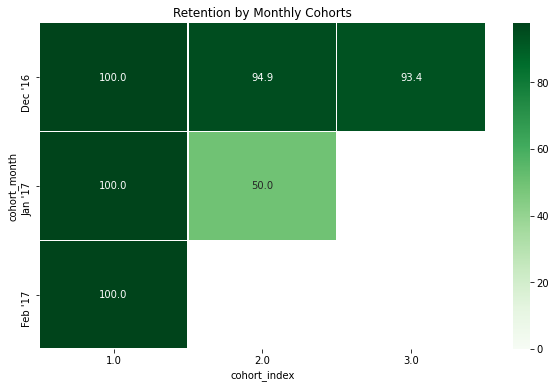

In [58]:
month_list = ["Dec '16", "Jan '17", "Feb '17"]


plt.figure(figsize=(10,6))
plt.title('Retention by Monthly Cohorts')
sns.heatmap(data=retention,
            annot = True,
            cmap = "Greens",
            vmin = 0.0,
            vmax = list(retention.max().sort_values(ascending = False))[1]+3,
            fmt = '.1f',
            linewidth = 0.3,
            yticklabels=month_list)

plt.show()

The result means that 50% of the cohort which signed up in Jaunary 2017, were active 2 months later. Column one here shows the month of first purchase, therefore the retention rate is 100%. This means as customers had to be active this month on to be assigned to this cohort.

### Weekly Cohort

In [59]:
def get_week(x):
    date = x.strftime("%Y-%m-%d")
    return dt.datetime.strptime(date, "%Y-%m-%d")

retails['purcase_week'] = retails['purchase_date'].apply(get_week)

In [60]:
def get_week_start(x):
    date = x.strftime("%Y-%m-%d")
    date_new = dt.datetime.strptime(date, "%Y-%m-%d")
    date_start = date_new - dt.timedelta(days= date_new.weekday())
    return date_start

retails['week_start'] = retails['purchase_date'].apply(get_week_start)

In [61]:
weekly_map = dict(zip(retails['week_start'].unique(), range(len(retails['week_start'].unique()))))
retails['purcase_week_id'] = retails['week_start'].map(weekly_map)
retails['cohort_week_id'] = retails.groupby('customer_id')['purcase_week_id'].transform('min')
retails['cohort_week'] = retails['cohort_week_id'].map(dict(zip(weekly_map.values(), weekly_map.keys())))
retails['cohort_weekly_index'] = retails['purcase_week_id'] - retails['cohort_week_id']

retails.head()

,purchase_id,item_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,product_id,price_per_one,total_price,purchase_month,cohort_month,cohort_index,purcase_week,week_start,purcase_week_id,cohort_week_id,cohort_week,cohort_weekly_index
0,538280,21873,11,2016-12-10 12:50:00,18427,0,Shop 3,21873,0.42,4.620000000000000,2016-12-01,2016-12-01,1.0,2016-12-10,2016-12-05,0,0,2016-12-05,0
1,541104,21873,0,2017-01-13 14:29:00,0,0,Shop 0,21873,0.42,0.000000000000000,2016-12-01,2016-12-01,1.0,2017-01-13,2017-01-09,1,0,2016-12-05,1
2,540418,21873,1,2017-01-07 11:04:00,0,0,Shop 0,21873,0.42,0.420000000000000,2016-12-01,2016-12-01,1.0,2017-01-07,2017-01-02,2,0,2016-12-05,2
3,541516,21873,2,2017-01-18 17:34:00,0,0,Shop 0,21873,0.42,0.840000000000000,2017-02-01,2016-12-01,3.0,2017-01-18,2017-01-16,3,0,2016-12-05,3
4,541566,21873,35,2017-01-19 11:50:00,23401,1,Shop 22,21873,0.42,14.699999999999999,2017-02-01,2016-12-01,3.0,2017-01-19,2017-01-16,3,0,2016-12-05,3


In [62]:
#count weekly active customers from each cohort
grouping = retails.groupby(['week_start', 'cohort_weekly_index'])
cohort_data = grouping['customer_id'].apply(pd.Series.nunique)

#Return number of unique elements in the object.
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='week_start', columns = 'cohort_weekly_index', values='customer_id')

In [63]:
#Customer retention
cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis=0)
retention = retention.round(3) * 100
retention.head()

cohort_weekly_index,0,1,2,3,4,5,6,7,8,9,10,11,12
week_start,,,,,,,,,,,,,
2016-11-28,100.0,4.100000000000001,5.200000000000000,2.100000000000000,1.000000000000000,4.100000000000001,9.300000000000001,21.600000000000001,10.299999999999999,19.600000000000001,20.599999999999998,66.0,NaN
2016-12-05,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-12,100.0,8.500000000000000,14.099999999999998,17.599999999999998,66.299999999999997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-19,100.0,11.100000000000000,5.600000000000001,5.600000000000001,11.100000000000000,27.800000000000004,11.100000000000000,16.699999999999999,38.899999999999999,144.400000000000006,NaN,NaN,NaN
2017-01-02,100.0,17.500000000000000,70.899999999999991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


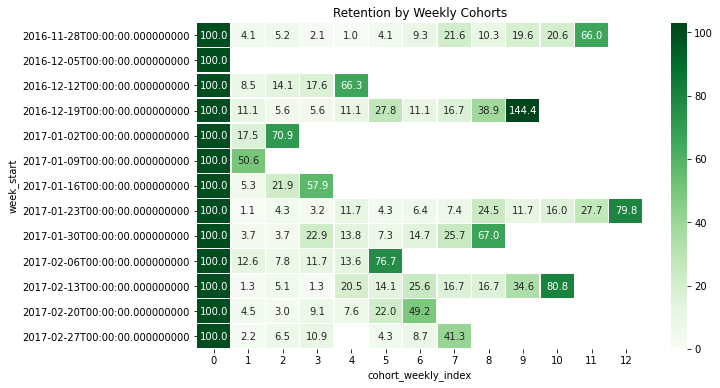

In [64]:
plt.figure(figsize=(10,6))
plt.title('Retention by Weekly Cohorts')
sns.heatmap(data=retention,
            annot = True,
            cmap = "Greens",
            vmin = 0.0,
            vmax = list(retention.max().sort_values(ascending = False))[1]+3,
            fmt = '.1f',
            linewidth = 0.3)

plt.show()
# SUSU: nice plot in general, but the y-axis label formatting doesn't need the time info, just cut it to the date

As for the results of the weekly cohort above, it can be concluded that there was a trend of fluctuation in the percentage of customers in the first week, 66% of the cohort which signed up in November 2016, were active 11 weeks later. As for the increase in customers at 144% who signed up on 19 December 2016, were active 9 weeks later. And what lasted until week 12 happened to customers who signed up on 23 Jan 2017 by 79%. And some are not active at all after 1 month signed up on 05 Dec 2016.

# Step 4. Hypothesis Testing

## Significant average purchase between members and non members

- **H0 - Null Hypothesis - The loyalty program does not have a significant effect on average purchase size**
- **H1 - Alternate hypothesis- The loyalty program has a significant effect on average purchase size**
- **alpha = 0.05**


In [65]:
# Separate the average purchase size for loyalty program members and non-members
avg_size_members = retails.loc[retails['loyalty_program'] == 1].dropna()['total_price']
avg_size_non_members = retails.loc[retails['loyalty_program'] == 0].dropna()['total_price']

# Perform Levene's test
st.levene(avg_size_members, avg_size_non_members)

LeveneResult(statistic=0.0024070981222802145, pvalue=0.9608698329459399)

In [66]:
# Define the significance level (alpha)
alpha = 0.05
results = st.ttest_ind(avg_size_members, avg_size_non_members, equal_var=False)
# SUSU: why do you use equal_var=False here? this means you'd be doing a Welche's t-test which is for 
# distributions that do not have a equal variance, but if I understand the result of the Levene's test
# above correctly, it looks like the variances of the two samples are NOT significantly different

In [67]:
if (results.pvalue < alpha):
    print("Reject the null hypothesis.")
else:
    print("We fail to reject the null hypothesis.")

print("p-value:", results.pvalue)

We fail to reject the null hypothesis.
p-value: 0.10625820163245492


Since the p-value (0.1063) is greater than the significance level (alpha = 0.05), we fail to reject the null hypothesis. This means that there is not enough evidence to suggest that the loyalty program has a significant effect on the average purchase size.

# Step. 5. Conclution and Business Recommendation

1. **Conclusion**

From the results of this retail dataset analysis, it aims to see how much influence the loyalty_program has on the average number of customer purchases. From the research results, it can be concluded that:
1. The average purchase between members and non-members of the loyalty_program is not that far off. With an average purchase for members of 11.171 and an average purchase for non-members of 8.826.
2. Non_members have the largest total purchases of 713920.449 compared to the total purchases of members which are 3 times less, namely 261525.61.
3. The number of items in baskets is dominated by customers who do not participate in the loyalty program with a total of 593520 items and for loyalty program members as many as 228693 items (which is less than half of non-member items).
4. The distribution of loyalty_program Members as much as 22.4% and Non-members as much as 77.6%.
5. Many visitors tend to come on Friday, more precisely on 2016-12-09.
6. The result means that 50% of the cohort which signed up in Jaunary 2017, were active 2 months later.

2. **Business Recommendation**

Based on the results of the hypothesis test, which indicated no significant effect of the loyalty program on the average purchase size, I would recommend the following to the project manager in the retail industry:
1. Focus on Customer Experience: Prioritize a superior customer experience. Make sure store staff provide friendly, efficient service and assist customers with their needs. Improve the quality of customer service and ensure a pleasant and satisfying shopping experience.

2. Product Quality and Competitive Offers: Pay attention to the quality of the products offered, ensure the availability of quality products, and consider competitive offers. Customers will tend to choose stores that provide the desired product at competitive prices. A specific example, by providing offers on certain days of the week, such as Friday - Sunday when many customers shop.


3. **Presentation**

- Final Project Presentation: <https://drive.google.com/file/d/1meudp60aJ3E2liOr54GODLhO9qUNQFpU/view?usp=sharing>
- Dasboard tableau link : <https://public.tableau.com/app/profile/rini.rusmiyati/viz/RetailsAnalyticsDashboard/Dashboard1>
(#SUSU: this is great, good to have some more visual resources to look at)